In [1]:
import numpy as np

# 0. What is data science

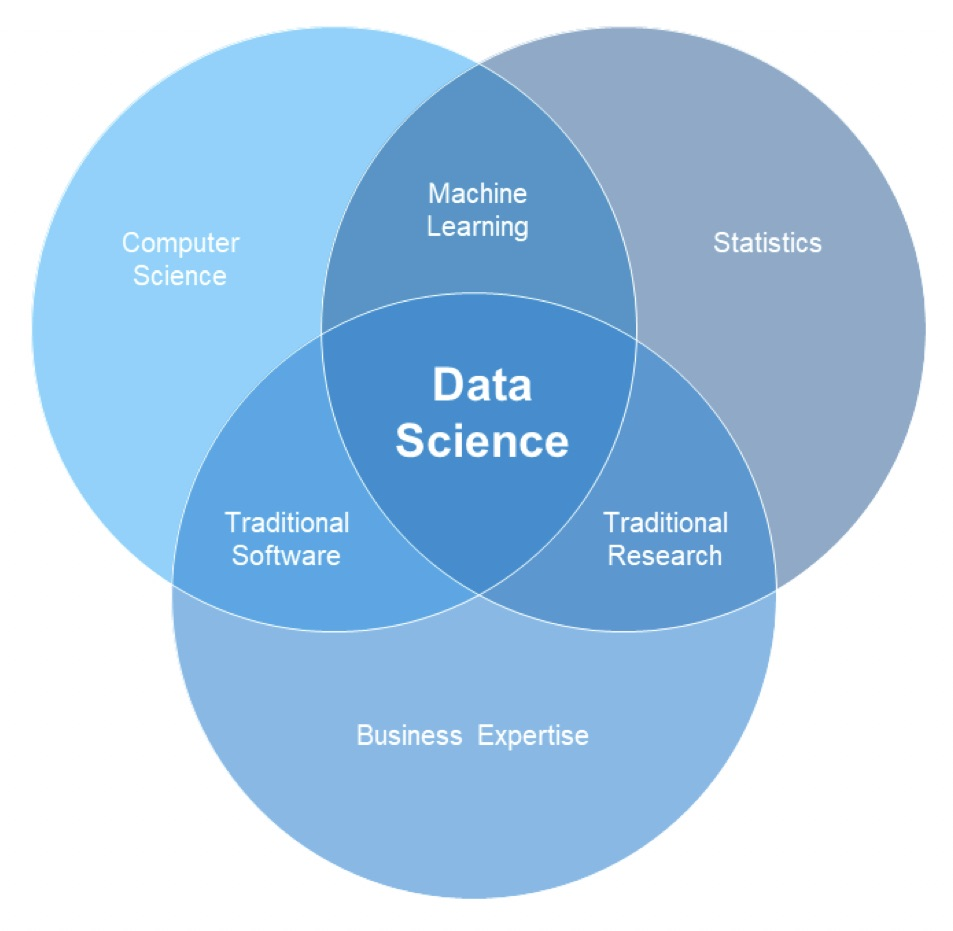

In [2]:
from IPython.display import Image
Image('data-science-venn-diagram.jpg', width=500)

# 1 Numerical computation in Python

## 1.1 Numpy + matplotlib

**Objective**: knows how to create and manipulate arrays in Python

* creating arrays (from list, arange, random)
* indexing + slices
* element-wise operations
* plotting with matplolib
* aggregations: mean/sum

### Installing and importing Python packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Create and slice

In [4]:
x = np.array([2, 3, 1, 5, 7, 8])

In [5]:
x[0]

2

In [6]:
x[0:3]

array([2, 3, 1])

### Predefined arrays

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.random.randn(10)

array([ 0.40676242,  0.51565745,  0.23462732,  1.22783992, -0.32626862,
        0.12270404, -0.91432826,  0.1070773 ,  1.03638546,  0.79587748])

### Operators on arrays

In [9]:
# by scalar
x, x * 3 

(array([2, 3, 1, 5, 7, 8]), array([ 6,  9,  3, 15, 21, 24]))

In [10]:
# by another array
# np.array([3, 2]) + np.array([3, 1, 3]) 
# ERROR: dimensions mismatch

In [11]:
np.array([3, 2]) + np.array([1, 3])

array([4, 5])

### Aggregations

In [12]:
np.mean(x)

4.333333333333333

In [13]:
np.sum(x)

26

**Exercise**:

1) Calculate the sum of all values from 3 to 51 (including 51).

2) Calculate the average of the following numbers: 1, 4, 10, -3. Subtract the average from each number.

## 1.2 Basic example: Linear regression

**Objective**: Understands the concept of statistical estimation

* least square error
* gradient descent
* normal equations?

Exercises:
* implement MSE
* calculate derivatives/gradient

In [14]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
y = 3.5 * x

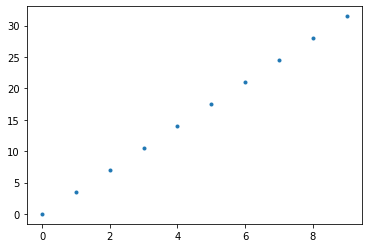

In [16]:
plt.plot(x, y, '.')

In [17]:
y = 3.5 * x + 2 + np.random.randn(len(x)) * 3

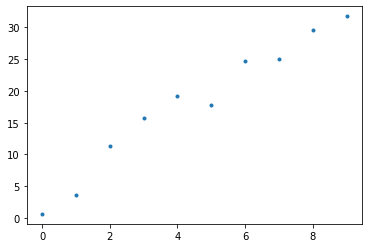

In [18]:
plt.plot(x, y, '.')

**Problem**: Given the `x` array (also called regressors or independent variable) and `y` array (dependent variable), find the best estimates of the value of linear coefficients `a` and `b`.

In [19]:
a, b = 1, 0
a2, b2 = 2, 1

In [20]:
y_guessed = a * x + b
y_guessed2 = a2 * x + b2

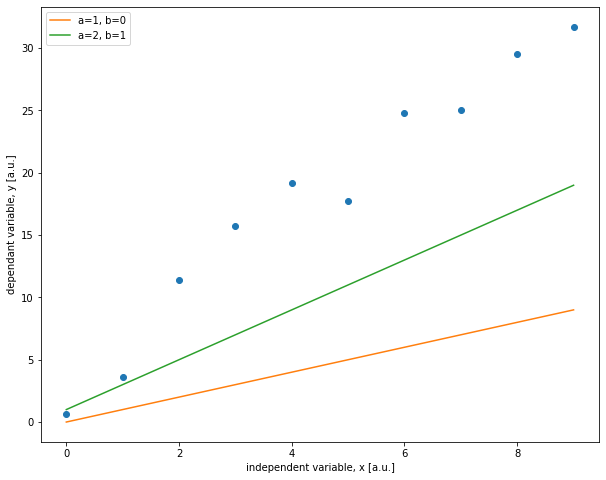

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o')
plt.plot(x, y_guessed, '-', label=f'a={a}, b={b}')
plt.plot(x, y_guessed2, '-', label=f'a={a2}, b={b2}')
plt.xlabel('independent variable, x [a.u.]')
plt.ylabel('dependant variable, y [a.u.]')

plt.legend()

### Mean-square error

In [22]:
np.mean((y_guessed - y) ** 2)

230.85113786669018

In [23]:
def mse(y_guessed, y):
    return np.mean((y_guessed - y) ** 2)

In [24]:
print(f"MSE a={a}, b={b}: {mse(y_guessed, y)}")
print(f"MSE a={a2}, b={b2}: {mse(y_guessed2, y)}")


MSE a=1, b=0: 230.85113786669018
MSE a=2, b=1: 82.5103917658126


### Gradient descent

In [25]:
da = np.sum(2*((a*x  + b) - y) * x)
db = np.sum(2*((a*x  + b) - y))

In [26]:
def grad(p):
    a, b = p
    da = np.mean(2*((a*x  + b) - y) * x)
    db = np.mean(2*((a*x  + b) - y))
    return np.array([da, db])

In [27]:
params = np.array([1., 1.])
n_iterations = 100
learning_rate = 0.01
for i in range(n_iterations):
    params = params - learning_rate * grad(params)
print(params)

[3.48924123 2.01588589]


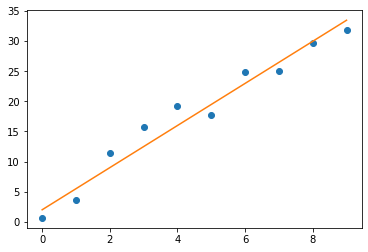

In [28]:
plt.plot(x, y, 'o')
plt.plot(x, params[0]* x + params[1], '-')

##  1.3 Object oriented programming

**Objective**: can encapsulate concepts in classes

* attributes
* methods
* scikit-learn-like API: fit, transform methods

**Exercises**:

* name methods, attributes
* fill the gaps (function arguments)

**Definition**: Classes are data objects (like lists) that contain data ("attributes") and functions operating on these data ("methods").

### Attributes

In [29]:
# defining a new class
class Foo:
    a = 1 # class attributes
    b = 2

In [30]:
foo = Foo() # creating an instance of a class
foo.a

1

In [31]:
boo = Foo()
boo.a = 5
print(boo.a)
print(foo.a)

5
1


### Methods

In [32]:
class Foo:
    a = 1
    b = 2
    
    def linear(self, x):
        return self.a * x + self.b

In [33]:
foo = Foo()
foo.linear(-10)

-8

### Constructor (initializer)

In [34]:
class Foo:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def linear(self, x):
        return self.a * x + self.b

In [35]:
foo = Foo(1, 3)
foo.linear(3)

6

### Implement linear regression class

In [36]:
class SimpleLinearRegression:
    
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.a = 1
        self.b = 1
        
    def predict(self, x):
        """Transform inputs into outputs."""
        return self.a * x + self.b
    
    def grad(self, x, y):
        """Calculate gradient"""
        a, b = self.a, self.b
        da = np.mean(2*((a*x  + b) - y) * x)
        db = np.mean(2*((a*x  + b) - y))
        return da, db
    
    def fit(self, x, y):
        """Fit function parameters"""
        n_iterations = 100
    
        for i in range(n_iterations):
            da, db = self.grad(x, y)
            self.a = self.a - self.learning_rate * da
            self.b = self.b - self.learning_rate * db
        

In [37]:
reg = SimpleLinearRegression()
reg.fit(x, y)
reg.predict(x)

array([ 2.01588589,  5.50512712,  8.99436834, 12.48360957, 15.9728508 ,
       19.46209202, 22.95133325, 26.44057448, 29.9298157 , 33.41905693])

In [38]:
reg.a, reg.b

(3.489241226636117, 2.015885891383611)

## Quiz

1) Fill in the gaps

```
class DummyModel:
    """Create a dummy model"""
     
    def _______(self, params): 
        self.params = params  
        
    def summarize(self):       
        """Summarize model""" 
        print("Params: {}".format(params))
        
```

* the variable `self.params` is called an `______` of the class `_____`.

* `self` is an `____` of a class `_____`

* `______` method of a class is called a constructor,

* `______` is an argument of the the constructor,

* `summarize` is called a `______` of a class




2) What will this code do:

```
model = DummyModel()
```

a) Show the value of `self.params`.

b) Show the string "Summarize model"

c) Fit the DummyModel

d) Nothing, it will produce an error.

# 2 Introduction to machine learning

## 2.1 Data preprocessing

* Getting data from kaggle.com
* data import
* DataFrame

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('titanic/train.csv')

In [41]:
target = df['Survived']
age = df['Age']

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
df_clean = df[['Survived', 'Age']].dropna()
survived = df_clean['Survived'].to_numpy()
age = df_clean[['Age']].to_numpy()

In [44]:
regression = SimpleLinearRegression(learning_rate=0.0001)

In [45]:
regression.fit(age, survived)

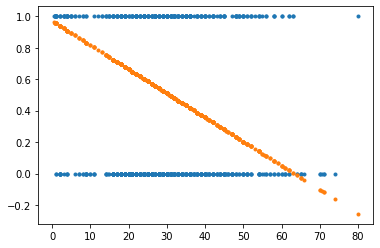

In [46]:
plt.plot(age, survived, '.')
plt.plot(age, regression.predict(age), '.')

In [47]:
((regression.predict(age) > 0.5) == survived).mean()

0.48580608714073864

**Question**: What is the chance level accuracy?

**Exercise**: Try finding the column/threshold that gives the best prediction.

**Exercise**: Name all categorical and numerical columns in the titanic data frame.

**Exercise**: Count the number of rows with missing data.

## 2.2 Logistic regression

* scikit-learn library
* fit/transform methods

### Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg = LogisticRegression()
lg.fit(age, survived)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
(lg.predict(age) == survived).mean()

0.5938375350140056

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(survived, lg.predict(age))

0.5938375350140056

**Exercise**: Try calculating the precision metrics.

**Exercise**: Investigate the influence of the `C` parameter on the prediction.



### Multiple featues

In [53]:
df_clean = df[['Survived', 'Age', 'Pclass', 'Fare']].dropna()

In [54]:
features = df_clean[['Age', 'Pclass', 'Fare']]
target = df_clean['Survived']

In [55]:
features.shape

(714, 3)

In [56]:
lg = LogisticRegression()
lg.fit(features, survived)
lg.predict(features)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [57]:
(lg.predict(features) == survived).mean()

0.7086834733893558

In [58]:
lg.coef_

array([[-0.03420453, -0.95189682,  0.00505657]])

**Exercise**: Use the `LinearRegression` class from scikit-learn  to fit the `a`, `b` and `c` coefficients of the following function:

`y = a * x1 + b * x2 + c`

where 

```
x1 = [1., 5., 2.]
x2 = [3., 4., 4.]
y  = [4.8, 13.3, 7.1]
```

## 2.3 Cross-validation

* training, validation and tests sets
* validation splits

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
test_features, validation_features, test_target, validation_target = train_test_split(features, target)

In [61]:
lg = LogisticRegression()
lg.fit(test_features, test_target)
lg.score(validation_features, validation_target)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6480446927374302

## 2.4 Feature engineering

* one-hot encoding
* value imputation?

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:

df_clean = df[['Survived', 'Age', 'Pclass', 'Fare', 'Embarked', 'Sex']].dropna()

encoder = OneHotEncoder(sparse=False)
categorical = encoder.fit_transform(df_clean[['Embarked', 'Sex']])

others = df_clean[['Age', 'Pclass', 'Fare']]
target = df_clean['Survived']

In [64]:
features = np.hstack([others, categorical])

In [65]:
features.shape

(712, 8)

In [66]:
train_features, validation_features, train_target, validation_target = train_test_split(features, target)

In [67]:
lg = LogisticRegression()
lg.fit(train_features, train_target).score(validation_features, validation_target)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

**Question**: The code above produces biased results. Can you tell why? 

## 2.5 Putting it all together

* pipelines

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
df_clean = df[['Survived', 'Age', 'Pclass', 'Fare', 'Embarked', 'Sex', 'SibSp']].dropna()
target = df_clean['Survived']
features = df_clean.drop(columns=['Survived'])

In [72]:
transformer = ColumnTransformer(
  [('categorical', OneHotEncoder(), ['Sex', 'Embarked', 'Pclass']),
   ('numerical', StandardScaler(), ['Age', 'Fare'])], 
  remainder='passthrough')

In [73]:
train_features, validation_features, train_target, validation_target = train_test_split(features, target)

In [74]:
estimator = make_pipeline(transformer, LogisticRegression())

In [75]:
estimator.fit(train_features, train_target).score(validation_features, validation_target)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7584269662921348

**Exercise**: Add imputation of missing values to the pipeline. Check out `sklearn.impute`.

# 3 Contributing to Open Source

## 3.1 What is Open Source?

## 3.2 Introduction to git

## 3.3 Collaborating on github